# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

In [16]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [19]:
import tensorflow as tf

# Check if TensorFlow can see the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Print GPU device name
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

# Check if TensorFlow is using GPU
print("TensorFlow is using GPU:", tf.test.is_built_with_cuda())

Num GPUs Available:  0
Please install GPU version of TF
TensorFlow is using GPU: False


In [18]:
import tensorflow as tf

# Specify GPU device
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    tf.config.set_visible_devices(physical_devices[0], 'GPU')

In [21]:
import tensorflow as tf

# Check if TensorFlow can see the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Print GPU device name
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

# Check if TensorFlow is using GPU
print("TensorFlow is using GPU:", tf.test.is_built_with_cuda())

Num GPUs Available:  0
Please install GPU version of TF
TensorFlow is using GPU: False


# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 56s 0us/step


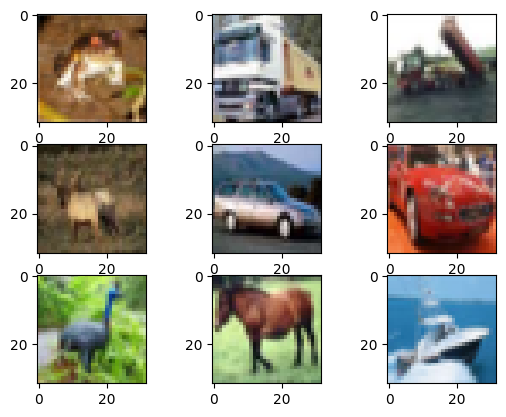

In [26]:
# Your code here :
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [11]:
from keras.backend import clear_session
clear_session()

In [12]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_cnn_model():
    model = Sequential([
        # Convolutional Front-end
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        
        # Flatten layer to convert 3D feature maps to 1D feature vector
        Flatten(),
        
        # Dense layers for classification
        Dense(100, activation='relu'),
        Dense(10, activation='softmax')  # Assuming 10 classes, adjust as needed
    ])
    
    return model

# Create and summarize the model
model = create_cnn_model()
model.summary()


c:\Users\IT Department\.conda\envs\iron_hack\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       819,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,206 (3.13 MB)

 Trainable params: 821,206 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [22]:
# Your code here :
from tensorflow.keras.optimizers import SGD

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the model
model = create_cnn_model()

# Compile the model
model.compile(optimizer=SGD(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, 
          epochs=50, 
          batch_size=512, 
          validation_data=(x_test, y_test))

c:\Users\IT Department\.conda\envs\iron_hack\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.1696 - loss: 2.2550 - val_accuracy: 0.2446 - val_loss: 2.1326
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.2549 - loss: 2.0964 - val_accuracy: 0.2843 - val_loss: 2.0014
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.3040 - loss: 1.9780 - val_accuracy: 0.3284 - val_loss: 1.9248
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.3316 - loss: 1.9094 - val_accuracy: 0.3200 - val_loss: 1.8957
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.3497 - loss: 1.8656 - val_accuracy: 0.3574 - val_loss: 1.8389
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.3610 - loss: 1.8332 - val_accuracy: 0.3734 - val_loss: 1.8112
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.3787 - loss: 1.8001 - val_accuracy: 0.3858 - val_loss: 1.7654
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.3903 - loss: 1.7658 - val_accuracy: 0.3888 - v

*   Plot the cross entropy loss curve and the accuracy curve

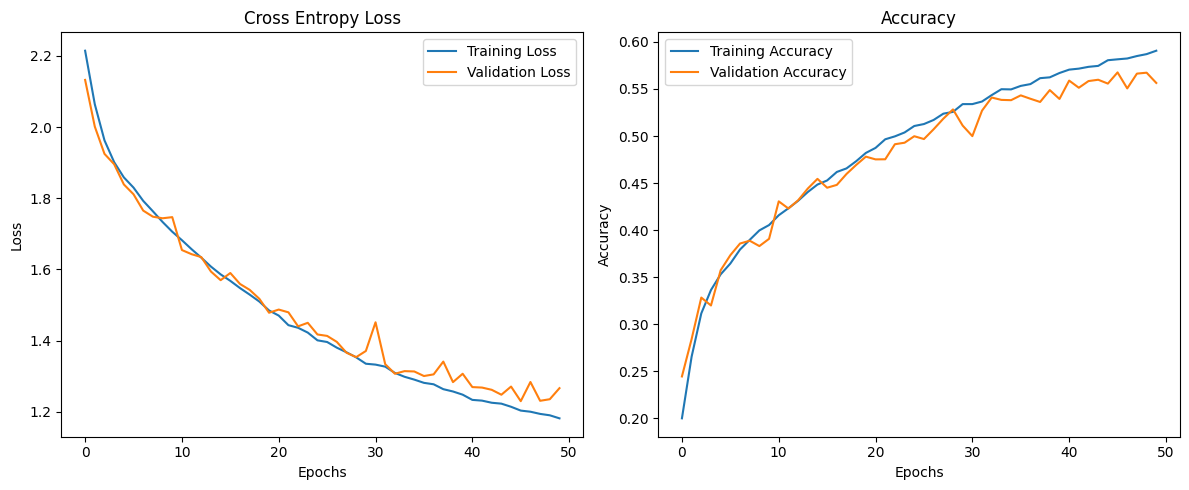

In [23]:

# Plot the results
plt.figure(figsize=(12, 5))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [24]:
from keras.backend import clear_session
clear_session()

In [27]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the deeper VGG-style model
vgg_model = Sequential([
    # First stack of two Conv2D layers
    Conv2D(32, (3, 3), 
           activation='relu',
           padding='same',
           input_shape=(32, 32, 3)),
    
    Conv2D(32, (3, 3),
           activation='relu',
           padding='same'),
    
    # Max pooling layer
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten layer
    Flatten(),
    
    # Dense layer with 128 units
    Dense(128, activation='relu'),
    
    # Output classification layer
    Dense(10, activation='softmax')
])

# Display model summary
vgg_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [29]:
pip install livelossplot

   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/6.9 MB 4.8 MB/s eta 0:00:02
   --------------- ------------------------ 2.6/6.9 MB 6.9 MB/s eta 0:00:01
   ------------------------ --------------- 4.2/6.9 MB 7.0 MB/s eta 0:00:01
   ----------------------------------- ---- 6.0/6.9 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
# Your code here :
from livelossplot import PlotLossesKeras
from tensorflow.keras.optimizers import SGD

# Compile the VGG-style model
vgg_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),  # SGD with momentum
                  loss='categorical_crossentropy',                  # Multi-class classification
                  metrics=['accuracy'])                             # Track accuracy

# Train the model
vgg_history = vgg_model.fit(x_train_normalized,                     # Normalized training data
                            y_train_one_hot,                        # One-hot encoded labels
                            epochs=50,                              # Number of epochs
                            batch_size=512,                         # Batch size
                            validation_split=0.2,                   # 20% for validation
                            verbose=1,
                            callbacks=[PlotLossesKeras()])          # Show progress

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(vgg_history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='--')
plt.title('VGG Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss'], label='Training Loss', color='blue')
plt.plot(vgg_history.history['val_loss'], label='Validation Loss', color='red', linestyle='--')
plt.title('VGG Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final values
print(f"Final Training Loss: {vgg_history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {vgg_history.history['val_loss'][-1]:.4f}")
print(f"Final Training Accuracy: {vgg_history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {vgg_history.history['val_accuracy'][-1]:.4f}")

NameError: name 'x_train_normalized' is not defined

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

In [12]:
# Your code here :

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [13]:
# Your code here :

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [14]:
# Your code here :

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [15]:
from keras.backend import clear_session
clear_session()

In [16]:
# Your code here :

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [17]:
# Your code here :

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
